<a href="https://colab.research.google.com/github/tanishkraghav/Serial_vs_Parallel_execution/blob/main/Serial_Parallel_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB

First 5 Rows:

   VendorID tpep_pickup_dat

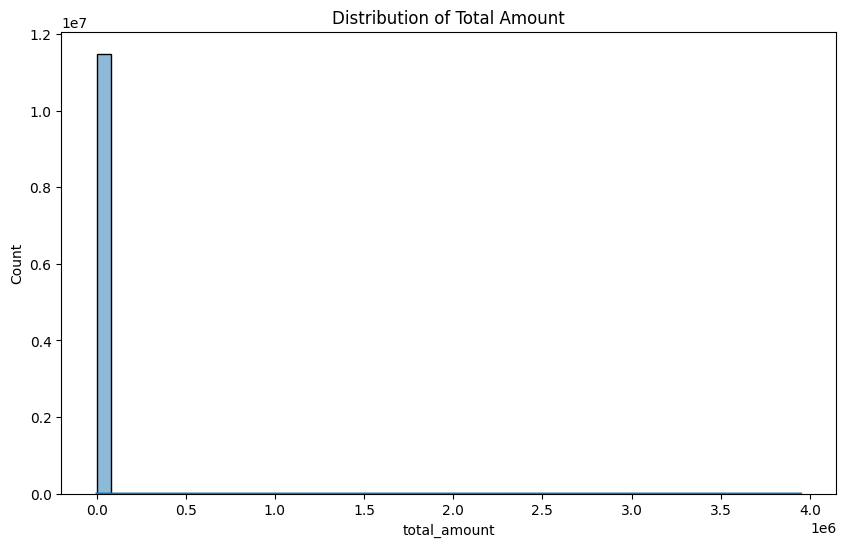

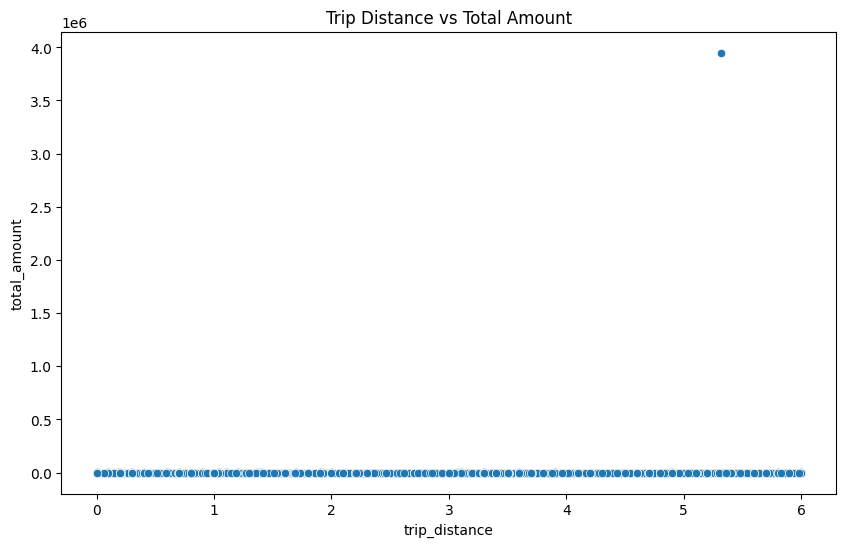

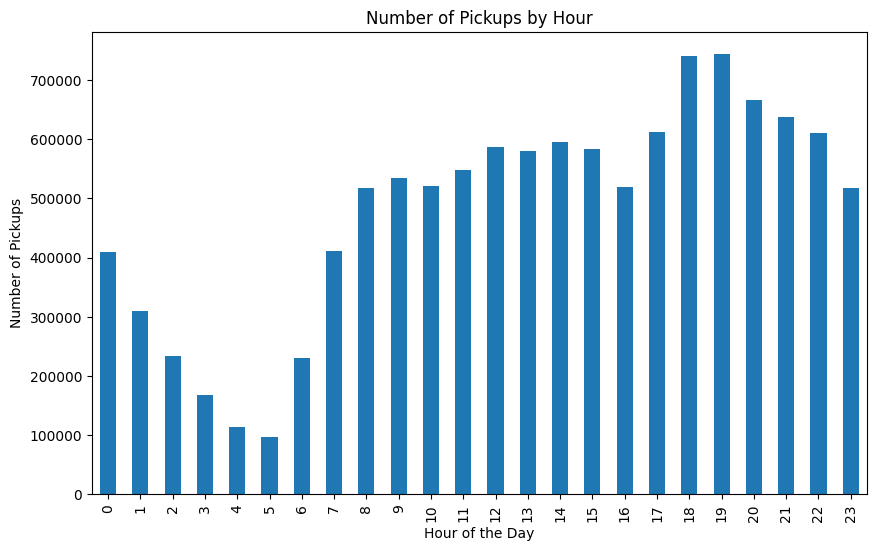

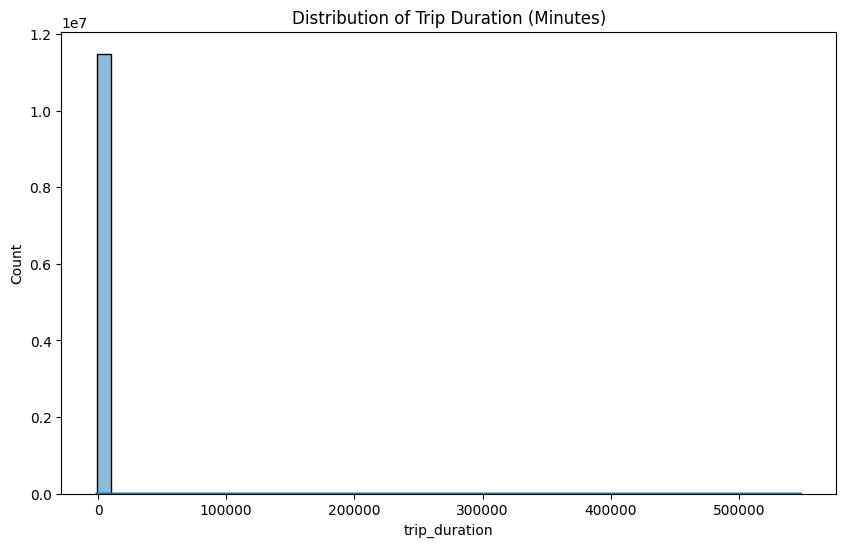

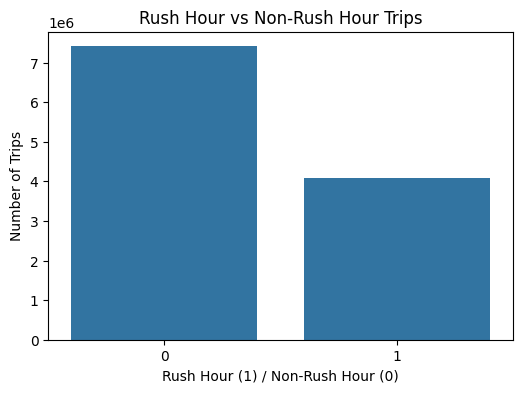

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/yellow_tripdata_2015-01.csv.zip'
df = pd.read_csv(file_path)


print("Initial Dataset Info:\n")
df.info()


print("\nFirst 5 Rows:\n")
print(df.head())


print("\nMissing Values:\n")
print(df.isnull().sum())

# Data type correction
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Removing duplicates
df.drop_duplicates(inplace=True)


Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1


df = df[~((df['trip_distance'] < (Q1 - 1.5 * IQR)) | (df['trip_distance'] > (Q3 + 1.5 * IQR)))]


# Extracting date features
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


df['rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)


df['long_trip'] = df['trip_distance'].apply(lambda x: 1 if x > 10 else 0)



# Distribution plot for total_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Amount')
plt.show()

# Trip distance vs total amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df)
plt.title('Trip Distance vs Total Amount')
plt.show()


# Pickup frequency by hour
plt.figure(figsize=(10, 6))
df['pickup_hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Trip duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (Minutes)')
plt.show()

# Rush hour analysis
rush_hour_counts = df['rush_hour'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=rush_hour_counts.index, y=rush_hour_counts.values)
plt.title('Rush Hour vs Non-Rush Hour Trips')
plt.xlabel('Rush Hour (1) / Non-Rush Hour (0)')
plt.ylabel('Number of Trips')
plt.show()




In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


file_path = "/content/yellow_tripdata_2015-01.csv.zip"


start_time = time.time()


df = pd.read_csv(file_path)


df = df.dropna()


features = ['passenger_count', 'trip_distance', 'RateCodeID', 'payment_type']
target = 'fare_amount'


if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.2f}")
else:
    print("Error: Required columns not found in dataset.")


end_time = time.time()

time_taken = end_time - start_time
print(f"Execution completed in {time_taken:.2f} seconds.")


Mean Absolute Error: 1.29
Execution completed in 1996.28 seconds.


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


file_path = "/content/yellow_tripdata_2015-01.csv.zip"


start_time = time.time()


df = pd.read_csv(file_path, usecols=['passenger_count', 'trip_distance', 'RateCodeID', 'payment_type', 'fare_amount'])


df = df.sample(frac=0.3, random_state=42)


df = df.dropna()


features = ['passenger_count', 'trip_distance', 'RateCodeID', 'payment_type']
target = 'fare_amount'

if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=4, warm_start=True)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.2f}")

else:
    print("Error: Required columns not found in dataset.")


end_time = time.time()
print(f"Optimized execution completed in {end_time - start_time:.2f} seconds.")


Mean Absolute Error: 1.30
Optimized execution completed in 137.64 seconds.



🧠 Running with 1 core(s)...


<ipython-input-1-3ba307ae11e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['pickup_hour'] = chunk['tpep_pickup_datetime'].dt.hour
<ipython-input-1-3ba307ae11e6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['is_rush_hour'] = chunk['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
<ipython-input-1-3ba307ae11e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



✅ Time: 91.63 sec | MAE: 3.59

🧠 Running with 2 core(s)...


<ipython-input-1-3ba307ae11e6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


✅ Time: 100.23 sec | MAE: 3.59

🧠 Running with 4 core(s)...


<ipython-input-1-3ba307ae11e6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


✅ Time: 103.83 sec | MAE: 3.59

🧠 Running with 8 core(s)...


<ipython-input-1-3ba307ae11e6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


✅ Time: 108.05 sec | MAE: 3.59


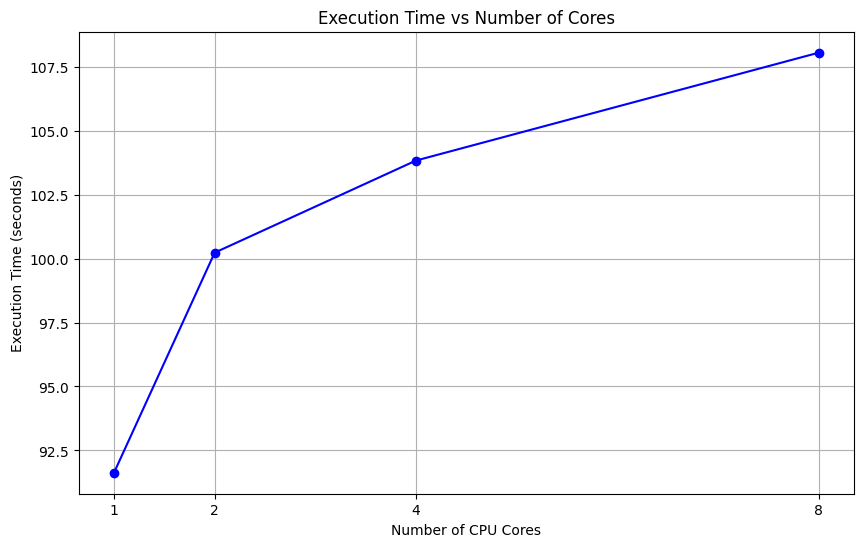

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import multiprocessing

file_path = "/content/yellow_tripdata_2015-01.csv.zip"  # Replace with actual path
chunksize = 100000

def process_chunk(chunk):
    chunk['tpep_pickup_datetime'] = pd.to_datetime(chunk['tpep_pickup_datetime'], errors='coerce')
    chunk['tpep_dropoff_datetime'] = pd.to_datetime(chunk['tpep_dropoff_datetime'], errors='coerce')
    chunk['trip_duration'] = (chunk['tpep_dropoff_datetime'] - chunk['tpep_pickup_datetime']).dt.total_seconds() / 60
    chunk = chunk[(chunk['trip_duration'] > 0) & (chunk['trip_duration'] < 300)]
    chunk['pickup_hour'] = chunk['tpep_pickup_datetime'].dt.hour
    chunk['is_rush_hour'] = chunk['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
    return chunk.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# List of core counts to test
core_counts = [1, 2, 4, 8]
execution_times = []

for cores in core_counts:
    print(f"\n🧠 Running with {cores} core(s)...")
    start_time = time.time()

    # Parallel preprocessing
    chunks = pd.read_csv(file_path, chunksize=chunksize)
    processed_chunks = Parallel(n_jobs=cores)(delayed(process_chunk)(chunk) for chunk in chunks)
    df = pd.concat(processed_chunks, ignore_index=True)

    # Features and target
    X = df[['trip_distance', 'trip_duration', 'passenger_count', 'pickup_hour', 'is_rush_hour']]
    y = df['total_amount']

    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression(n_jobs=cores)
    model.fit(X_train, y_train)

    # Evaluate (optional)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()
    total_time = end_time - start_time
    execution_times.append(total_time)

    print(f"✅ Time: {total_time:.2f} sec | MAE: {mae:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(core_counts, execution_times, marker='o', linestyle='-', color='blue')
plt.title('Execution Time vs Number of Cores')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.xticks(core_counts)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

file_path = "/content/yellow_tripdata_2015-01.csv.zip"  # Replace with actual path

# Preprocessing function
def preprocess_data(df):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 300)]
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['is_rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
    return df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Load and sample 50% of data
df = pd.read_csv(file_path)
df = df.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Preprocess
df = preprocess_data(df)

# Feature/Target selection
X = df[['trip_distance', 'trip_duration', 'passenger_count', 'pickup_hour', 'is_rush_hour']]
y = df['total_amount']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testing with multiple cores
core_counts = [1, 2, 4, 8]
execution_times = []
maes = []
r2_scores = []

for cores in core_counts:
    print(f"\n🌲 Training Random Forest with {cores} core(s)...")
    start_time = time.time()

    model = RandomForestRegressor(n_estimators=100, n_jobs=cores, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end_time = time.time()

    total_time = end_time - start_time
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    execution_times.append(total_time)
    maes.append(mae)
    r2_scores.append(r2)

    print(f"✅ Time: {total_time:.2f} sec | MAE: {mae:.2f} | R²: {r2:.4f}")

# Plot 1: Execution Time
plt.figure(figsize=(10, 6))
plt.plot(core_counts, execution_times, marker='o', color='blue')
plt.title('Execution Time vs CPU Cores (50% Data)')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.savefig("rf_execution_time_vs_cores_half_data.png", dpi=300)
plt.show()

# Plot 2: MAE vs Cores
plt.figure(figsize=(10, 6))
plt.plot(core_counts, maes, marker='s', color='green')
plt.title('MAE vs CPU Cores (50% Data)')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.savefig("rf_mae_vs_cores_half_data.png", dpi=300)
plt.show()

# Plot 3: R² vs Cores
plt.figure(figsize=(10, 6))
plt.plot(core_counts, r2_scores, marker='^', color='purple')
plt.title('R² Score vs CPU Cores (50% Data)')
plt.xlabel('Number of CPU Cores')
plt.ylabel('R² Score')
plt.grid(True)
plt.savefig("rf_r2_vs_cores_half_data.png", dpi=300)
plt.show()

print("📊 All plots saved using half of the dataset.")


<ipython-input-1-4b44487f09fd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
<ipython-input-1-4b44487f09fd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
<ipython-input-1-4b44487f09fd>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda


🌲 Training Random Forest with 1 core(s)...


<ipython-input-1-e55077796b62>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



Training with 1 core(s)...
Cores: 1 | Time: 443.24s | MAE: 1.75 | R²: 0.8129

Training with 2 core(s)...
Cores: 2 | Time: 312.40s | MAE: 1.75 | R²: 0.8129

Training with 4 core(s)...
Cores: 4 | Time: 314.53s | MAE: 1.75 | R²: 0.8129


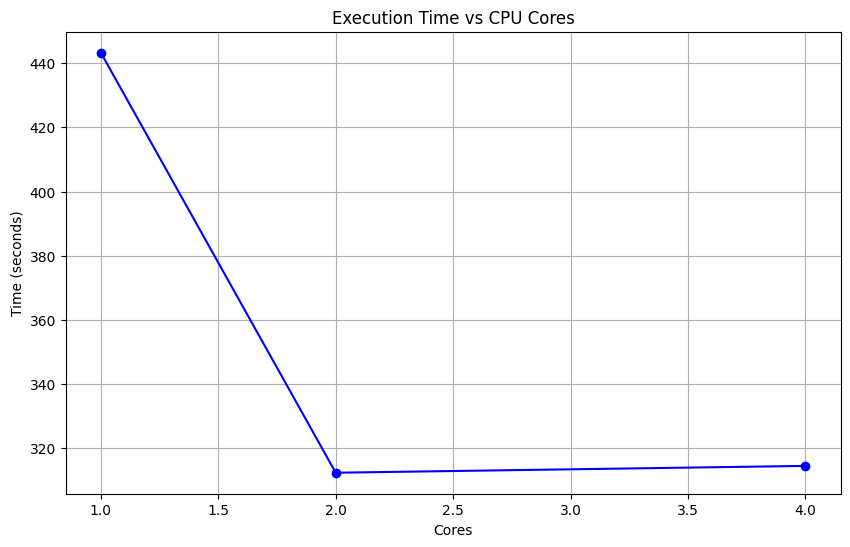

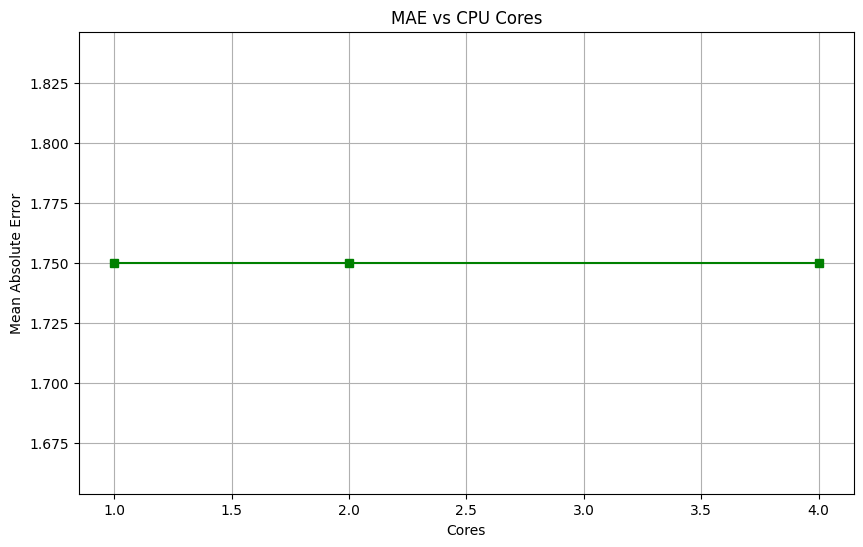

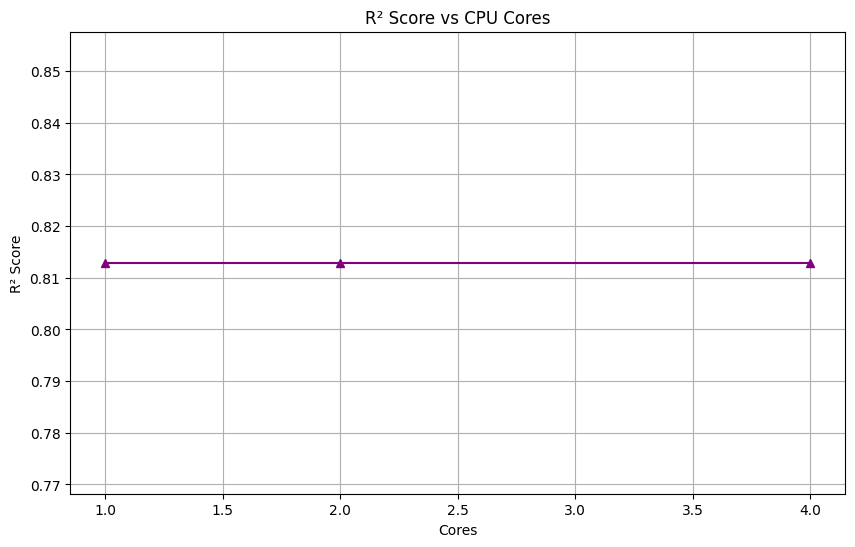

✅ All plots saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

file_path = "/content/yellow_tripdata_2015-01.csv.zip"
chunk_size = 200_000
sample_frac_per_chunk = 0.2

sampled_df_list = []


for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    sampled_chunk = chunk.sample(frac=sample_frac_per_chunk, random_state=42)
    sampled_df_list.append(sampled_chunk)


df = pd.concat(sampled_df_list, ignore_index=True)

# Preprocessing
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 300)]
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

# Features and target
X = df[['trip_distance', 'trip_duration', 'passenger_count', 'pickup_hour', 'is_rush_hour']]
y = df['total_amount']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Core counts to test
core_counts = [1, 2, 4]
execution_times, maes, r2_scores = [], [], []

# Training with multiple cores
for cores in core_counts:
    print(f"\nTraining with {cores} core(s)...")
    start = time.time()

    model = RandomForestRegressor(n_estimators=50, n_jobs=cores, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    end = time.time()

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    time_taken = end - start

    execution_times.append(time_taken)
    maes.append(mae)
    r2_scores.append(r2)

    print(f"Cores: {cores} | Time: {time_taken:.2f}s | MAE: {mae:.2f} | R²: {r2:.4f}")

# Plotting: Execution Time
plt.figure(figsize=(10, 6))
plt.plot(core_counts, execution_times, marker='o', color='blue')
plt.title('Execution Time vs CPU Cores')
plt.xlabel('Cores')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.savefig("chunked_execution_time_vs_cores.png")
plt.show()

# Plotting: MAE
plt.figure(figsize=(10, 6))
plt.plot(core_counts, maes, marker='s', color='green')
plt.title('MAE vs CPU Cores')
plt.xlabel('Cores')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.savefig("chunked_mae_vs_cores.png")
plt.show()

# Plotting: R² Score
plt.figure(figsize=(10, 6))
plt.plot(core_counts, r2_scores, marker='^', color='purple')
plt.title('R² Score vs CPU Cores')
plt.xlabel('Cores')
plt.ylabel('R² Score')
plt.grid(True)
plt.savefig("chunked_r2_vs_cores.png")
plt.show()

print("✅ All plots saved successfully!")


1. Load the dataset in chunks (to avoid memory issues)
2. For each chunk:
     a. Randomly sample a fraction of the data (e.g., 20%)
     b. Append the sampled data to a list
3. Concatenate all sampled data into a single DataFrame
4. Preprocess the data:
     a. Convert datetime columns
     b. Create new features (trip duration, pickup hour, rush hour flag)
     c. Remove rows with invalid or missing values
5. Select features and target variable
6. Split the data into training and testing sets
7. Initialize RandomForestRegressor with n_jobs = 1 (serial)
8. Record the start time
9. Train the model on the training data
10. Record the end time
11. Make predictions on the test set
12. Calculate evaluation metrics:
     a. Mean Absolute Error (MAE)
     b. R² Score
13. Compute total training time
14. Display time and accuracy metrics


1. Load the dataset in chunks (same as serial)
2. For each chunk:
     a. Randomly sample a fraction of the data (e.g., 20%)
     b. Append the sampled data to a list
3. Concatenate all sampled data into a single DataFrame
4. Preprocess the data (same steps as serial)
5. Select features and target variable
6. Split the data into training and testing sets
7. For each number of cores in [2, 4, 8, ...]:
     a. Initialize RandomForestRegressor with n_jobs = cores
     b. Record the start time
     c. Train the model
     d. Record the end time
     e. Predict on test data
     f. Calculate MAE and R² Score
     g. Save the training time and metrics for this core count
8. Plot results:
     a. Execution Time vs CPU Cores
     b. MAE vs CPU Cores
     c. R² Score vs CPU Cores
